# Homemade Multiclass Perceptron

In [17]:
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\eee\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [66]:
from copy import deepcopy

class MultiClassPerceptron(object):
    
    def __init__(self, n_epochs = 1000, verbose = 0):
        self.weights = None
        self.n_epochs = n_epochs
        self.verbose = verbose
    
    def fit(self, x, y):
        # Append a ones column to the feature for the bias
        data = np.ones((x.shape[0], x.shape[1]+1))
        data[:, 0:x.shape[1]] = x
        # Set the targets as integers for comparison
        targets = y.astype(int)
    
        # Initialize the weights as a matrix 
        # number of classes by number of features
        weights = np.zeros((len(set(y)), x.shape[1]+1))
        past_weights = np.zeros((len(set(y)), x.shape[1]+1))
        for epoch in range(self.n_epochs):
            for i, target in zip(data, targets):
                temp = np.dot(i, weights.T)
                pred = np.argmax(temp)
                # If wrongly predicted update prediction
                if pred != target:
                    weights[target, :] = weights[target, :] + i
                    weights[pred, :] = weights[pred, :] - i
        
            if np.abs(weights - past_weights).all() < np.finfo(float).eps:
                break
            past_weights = deepcopy(weights)
        
            if self.verbose == 1:
                print('Iteration: ', epoch)
                print(weights)
                print('---------------------------------------------')
        self.weights = weights

    def predict(self, x):
        data = np.ones((  x.shape[0], x.shape[1]+1  ))
        data[:, 0:x.shape[1]] = x
        predictions = np.argmax(np.dot(data, self.weights.T), axis = 1)
        return predictions

    def score(self, x, y):
        pred = predict(x, self.weights)
        return sum(pred == y_test)/len(pred)

Generate data

In [73]:
def gen_data(params, n):
    dims = len(params[0])
    num_classes = len(params)
    
    x = np.zeros((n*num_classes, dims))
    y = np.zeros((n*num_classes,))
    for ix, i in enumerate(range(num_classes)):
        inst = np.random.randn(n, dims)
        
        for dim in range(dims): x[ix*n:(ix+1)*n,dim] = np.random.normal(params[ix][dim][0], 
                                                                        params[ix][dim][1], n)
        y[ix*n:(ix+1)*n] = ix
    return x, y

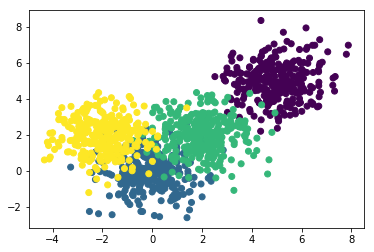

In [74]:
params = [[[ 5,0.5],  [ 5,0.5]], 
          [[ 0,0.5],  [ 0,0.5]], 
          [[-5,0.5],  [ -5,0.5]],
          [[-5,0.5],  [1,0.5]]]

params = [[[ 5,1],  [ 5,1]], 
          [[ 0,1],  [ 0,1]],
          [[2, 1],  [ 2,1]],
          [[-2, 1],  [ 2,1]]]

n = 300
x, y = gen_data(params, 300)

plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

Test the classifier

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

clf = MultiClassPerceptron(n_epochs = 3000, verbose = 0)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

[[ 16.48649206   6.8382008  -58.        ]
 [ -1.65456819  -5.30128484  28.        ]
 [ -0.60922012   0.93450119  16.        ]
 [-14.22270375  -2.47141715  14.        ]]


Validate the results

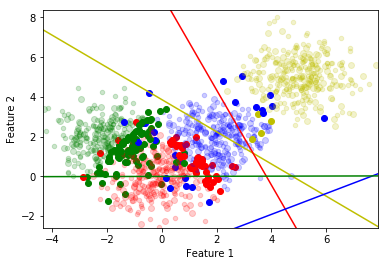

In [75]:
example = [-5,-5,1]

colors = ['y', 'r', 'b', 'g', 'k']

# Predict training set
predictions = predict(x_train, weights)
for i, t, p in zip(x_train, y_train, predictions):
    if t == p: plt.scatter(i[0], i[1], c=colors[int(t)], alpha = 0.2, s=20)
    else: plt.scatter(i[0], i[1], c=colors[int(t)], alpha = 1)

# Predict test set
predictions = predict(x_test, weights)
for i, t, p in zip(x_test, y_test, predictions):
    if t == p: plt.scatter(i[0], i[1], c=colors[int(t)], alpha = 0.2)
    else: plt.scatter(i[0], i[1], c=colors[int(t)], alpha = 1)
    
# Plot the linear separators
x1 = np.linspace(np.min(x[:,0]),np.max(x[:,1]),2)
x2 = np.zeros((weights.shape[0], 2))
for ix_w, weight in enumerate(weights):
    x2 = 1 * ( - weight[2] - weight[1]*x1) / weight[0]
    plt.plot(x1, x2, c = colors[ix_w])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.xlim([np.min(x[:,0]), np.max(x[:,0])])
plt.ylim([np.min(x[:,1]), np.max(x[:,1])])

plt.show()

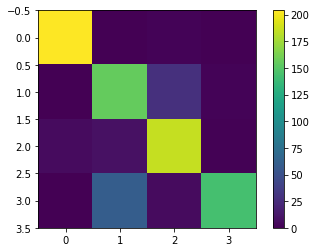

[[204   0   2   0]
 [  0 156  28   2]
 [  6   9 186   1]
 [  0  60   6 144]]


In [76]:
from sklearn.metrics import confusion_matrix

predictions = predict(x_train, weights)
plt.imshow(confusion_matrix(y_train, predictions))
plt.colorbar()
plt.show()

conf = confusion_matrix(y_train, predictions)

print(conf)

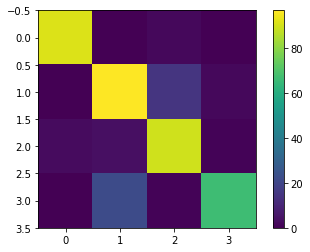

[[92  0  2  0]
 [ 0 97 15  2]
 [ 3  4 90  1]
 [ 0 22  1 67]]


In [77]:
predictions = predict(x_test, weights)
plt.imshow(confusion_matrix(y_test, predictions))
plt.colorbar()
plt.show()

conf = confusion_matrix(y_test, predictions)

print(conf)